# Importar Libreria

In [1]:
import os
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cargar dataset

In [2]:
df_region=pd.read_csv('internet_region_TS.csv')
df_countries=pd.read_csv('final_countries_TS.csv')


# Análisis Areas

## Gráfica Internet user rate evolution por areas


AREAS INTERNET USER RATE EVOLUTION GRAPH:<br>
    -World<br>
    -OECD members<br>
    -Least developed countries: UN classification<br>
    -North America<br>
    -Euro area<br>
Igualando la variable region a cada una de las zonas arriba mencionadas, se muestra su evolución desde 1990 hasta la actualidad


In [3]:
Region='World'
ZONA=df_region[df_region['Entity']==Region]
px.line(ZONA, x='Year', y='Internet users (%)', title=f'{Region} Internet user rate Evolution',color_discrete_sequence=px.colors.sequential.RdBu)

# Análisis Países

## Visualizar dataset: head, null, info, describe, etc

In [4]:
df_countries.head()

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
0,Afghanistan,AFG,Asia,Southern Asia,1990,0.0,Ingreso bajo,NaN,0.0,0.0
1,Afghanistan,AFG,Asia,Southern Asia,1991,0.0,Ingreso bajo,NaN,NaN,0.0
2,Afghanistan,AFG,Asia,Southern Asia,1992,0.0,Ingreso bajo,NaN,NaN,0.0
3,Afghanistan,AFG,Asia,Southern Asia,1993,0.0,Ingreso bajo,NaN,NaN,0.0
4,Afghanistan,AFG,Asia,Southern Asia,1994,0.0,Ingreso bajo,NaN,NaN,0.0


<AxesSubplot: >

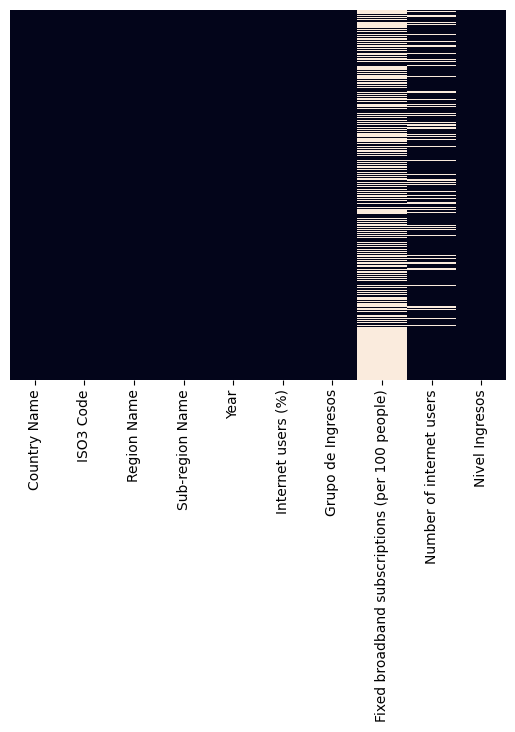

In [5]:
sns.heatmap(df_countries.isnull(),cbar=False,cmap='rocket', yticklabels=False)

In [6]:
len(df_countries[df_countries['Number of internet users'].fillna(0)==0]['Year'].unique().tolist())

28

In [7]:
df_countries.describe()

,Year,Internet users (%),Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
count,5398.000000,5398.000000,2290.000000,4.559000e+03,5398.000000
mean,2004.685810,23.448131,8.245030,8.754389e+06,1.851056
std,8.837184,29.183001,11.167399,4.415329e+07,1.041144
min,1990.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1997.000000,0.221412,0.166125,3.512050e+04,1.000000
50%,2005.000000,7.473852,2.338566,3.994340e+05,2.000000
75%,2012.000000,41.597500,13.332206,3.637529e+06,3.000000
max,2020.000000,100.000000,62.280620,9.934818e+08,3.000000


In [8]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country Name                                    5398 non-null   object 
 1   ISO3 Code                                       5398 non-null   object 
 2   Region Name                                     5398 non-null   object 
 3   Sub-region Name                                 5398 non-null   object 
 4   Year                                            5398 non-null   int64  
 5   Internet users (%)                              5398 non-null   float64
 6   Grupo de Ingresos                               5398 non-null   object 
 7   Fixed broadband subscriptions (per 100 people)  2290 non-null   float64
 8   Number of internet users                        4559 non-null   float64
 9   Nivel Ingresos                           

In [9]:
df_countries['ISO3 Code']=df_countries['ISO3 Code'].astype(str)

In [10]:
df_countries.shape

(5398, 10)

## Analizamos la variable year

In [11]:
year=df_countries['Year'].value_counts()
px.bar(x=year.index, y=year,title='Columna Year',color_continuous_scale="tealgrn",color_discrete_sequence=px.colors.sequential.Tealgrn_r)

In [13]:
px.scatter(df_countries,x='Internet users (%)', y='Year',title='Tasa Internet User(%) distinta a cero',color='Grupo de Ingresos',width=1000, height=600,color_discrete_sequence=px.colors.sequential.RdBu_r[::-1])

## Analizamos la variable Internet User(%)

### Grafica de la evolución por países

In [13]:
Country='United States'
Country_data=df_countries[df_countries['Country Name']==Country]
px.line(Country_data, x='Year', y='Internet users (%)', title=f'{Country} Internet user rate Evolution', color_discrete_sequence=px.colors.sequential.RdBu)

### Analisis TOP15: Internet users(%)

Ranking Top Countries

In [14]:
yr=2020
year_dat=df_countries[df_countries['Year']==yr]
top_yr=year_dat.sort_values(by='Internet users (%)',ascending=False).head(15)
px.bar(top_yr,x='Country Name', y='Internet users (%)',title=f'Año {yr} Top 15',color='Region Name',color_discrete_sequence=px.colors.sequential.Tealgrn_r)

Ranking Tail Countries

In [15]:
yr=2020
year_dat=df_countries[df_countries['Year']==yr]
tail_yr=year_dat.sort_values(by='Internet users (%)',ascending=False).tail(15)
px.bar(tail_yr,x='Country Name', y='Internet users (%)',title=f'Año {yr} Tail 15',color='Region Name',color_discrete_sequence=px.colors.sequential.Tealgrn_r)

### Análisis por regiones

### Visualización general para cualquier año

In [16]:
yr=2020
year_dat=df_countries[df_countries['Year']==yr]
px.scatter(year_dat, x='Sub-region Name', y='Internet users (%)',size='Nivel Ingresos',size_max=20,title=f" Region Año {yr}",color='Grupo de Ingresos',width=1000, height=600,color_discrete_sequence=px.colors.sequential.RdBu,facet_col="Region Name")

In [17]:
yr=2020
year_dat=df_countries[df_countries['Year']==yr]
px.scatter(year_dat, x='Sub-region Name', y='Internet users (%)',size='Nivel Ingresos',size_max=20,title=f" Sub Región Año {yr}",color='Grupo de Ingresos',width=1000, height=600,color_discrete_sequence=px.colors.sequential.Tealgrn_r,facet_col="Region Name")

In [18]:
#Con los datos disponibles, ¿cuántos países están por debajo del 80%?
yr=2020
year_dat=df_countries[df_countries['Year']==yr]
menos_80=year_dat[year_dat['Internet users (%)']<20]
menos_80[['Country Name','Region Name','Sub-region Name','Internet users (%)']]

,Country Name,Region Name,Sub-region Name,Internet users (%)
4639,Afghanistan,Asia,Southern Asia,18.4
4687,Burundi,Africa,Sub-Saharan Africa,9.4
4760,Central African Republic,Africa,Sub-Saharan Africa,10.4
5113,Mozambique,Africa,Sub-Saharan Africa,16.5
5266,Sierra Leone,Africa,Sub-Saharan Africa,18.0
5284,South Sudan,Africa,Sub-Saharan Africa,6.5
5321,Chad,Africa,Sub-Saharan Africa,10.4
5356,Uganda,Africa,Sub-Saharan Africa,19.9
5392,Zambia,Africa,Sub-Saharan Africa,19.8


In [19]:
Code='HTI'# grafica para la evolucion de cualquier pasi
PH=df_countries[df_countries['ISO3 Code']==Code]
px.line(PH, x='Year', y='Internet users (%)', title=f'{Code} Internet user rate Evolution',color_discrete_sequence=px.colors.sequential.RdBu)

### Mapa mundi 

In [20]:
yr=2020
year_dat=df_countries[df_countries['Year']==yr]
px.choropleth(year_dat, locations='Country Name', locationmode='country names',color='Internet users (%)', color_continuous_scale= 'Tealgrn')


## ¿Cúantas personas utilizan internet? Representar su distribución

In [21]:
#graficamos
yr=2020
year_data=df_countries[df_countries['Year']==yr]
px.pie(year_data, values='Number of internet users', names ='Sub-region Name',title=f"Año {yr}",color_discrete_sequence=px.colors.sequential.RdBu,  opacity=0.9,
     hole=0.5,width=800, height=500)

In [22]:
yr=2020
year_dat=df_countries[df_countries['Year']==yr]
fig = px.choropleth(year_dat, locations='Country Name', locationmode='country names',color='Number of internet users', color_continuous_scale= 'Tealgrn')
fig.show()

# Conclusión del análisis Areas y Paises

Internet tiene más de 50 años: Datos de su evolución.<br>
En 199o, las estadísticas sugieren que solo la mitad del uno por ciento de la población mundial estaba en líneas. En la década de los noventa, al menos en algunas partes del mundo, esto comienza a cambiar.<br>

En año 2000, año en el que estalla la burbuja de las empresas “puntocom”, se les denominaba “puntocom” a todas aquellas compañías innovadoras que tenían presencia y por lo tanto un dominio”.com” en internet, casi la mitad de la población norteamericana accedía a la información a través de Internet. En la Euro área, lo hacía el 22%. Pero en la mayor parte del mundo, Internet no había llegado aún, en ese momento menos del 7% del mundo estaba en línea<br>

Quince años después, en 2016, en Estados Unidos, el 84% de las personas tenía acceso a internet. Durante estos años, países de muchas partes del mundo se pusieron al día, véase el mapa, y sobrepasaron esta cifra. Islandia, Bermudas y Bahrain encabeza la clasificación con el 98% de la población en línea en 2016 (vease ranking). En el otro extremo del espectro, todavía hay países donde casi nada ha cambiado desde 1990.<br>

No obstante, la tendencia general a nivel mundial, es clara: el número de usuarios de internet crece cada año.<br>

# Estudio de la brecha digital

Llegados a este punto sabemos que internet nos ofrecen muchas oportunidades que pueden mejorar nuestra vida, sin embargo, no todo el mundo puede acceder a las mismas. La diferencia de accesibilidad y uso de tecnologías digitales para determinadas personas o grupos se conoce como brecha digital y la lucha para combatirla se ha convertido en parte de la agenda de muchos gobiernos e instituciones de todo el mundo.<br>
Analizamos las diferencias de acceso digital entre los distintos países del mundo en función del poder adquisitivo de sus ciudadanos. Para evaluar de manera correcta las diferencias entre los países de distinto nivel de ingreso, es necesario tener en cuenta tanto la calidad como el método de acceso a internet, es por ello que utilizaremos la variable “Suscripciones de banda ancha”

In [23]:
df_fixed=pd.read_excel('fixed_boradband_suscriptions.xlsx')

In [24]:
df_fixed.head()

,Country Name,Country Code,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,1399.0,6963.0,12274.0,13953.0,...,NaN,19200.0,19200.0,19000.0,NaN,NaN,NaN,19000.0,19000.0,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,200.0,220.0,500.0,...,1500.0,1500.0,1500.0,7067.0,8801.0,9182.0,15999.0,19683.0,26570.0,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7458.0,...,20512.0,22282.0,87750.0,153571.0,84724.0,96919.0,109561.0,119068.0,230610.0,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,272.0,272.0,...,160088.0,182556.0,207964.0,242870.0,266379.0,303612.0,361947.0,436192.0,508937.0,NaN
4,Andorra,AND,NaN,NaN,NaN,1148.0,3601.0,6282.0,10341.0,14616.0,...,26905.0,27734.0,28770.0,30694.0,32490.0,34284.0,35663.0,36358.0,37000.0,NaN


<AxesSubplot: >

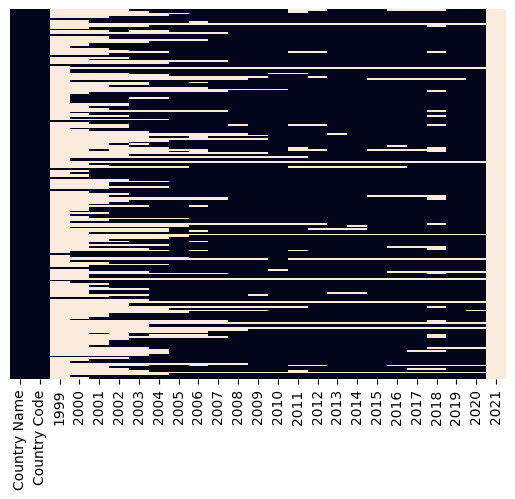

In [25]:
sns.heatmap(df_fixed.isnull(),cbar=False,cmap='rocket', yticklabels=False)

In [26]:
sud_fixed=df_fixed[['Country Name','Country Code','2020']]#estudiamos la diferencias de acceso digital en el año 2020 por lo que seleccionamos unicamente esta columna

In [27]:
sud_fixed.head()

,Country Name,Country Code,2020
0,Aruba,ABW,19000.0
1,Afghanistan,AFG,26570.0
2,Angola,AGO,230610.0
3,Albania,ALB,508937.0
4,Andorra,AND,37000.0


In [28]:
sud_fixed.isnull().sum()

Country Name     0
Country Code     0
2020            14
dtype: int64

In [29]:
sud_fixed.dropna(inplace=True)#vamos a eliminar los valores nulos
sud_fixed.isnull().sum()

C:\Users\Jose Antonio\AppData\Local\Temp\ipykernel_3340\1550961343.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name    0
Country Code    0
2020            0
dtype: int64

In [30]:
df_geo=pd.read_csv('geography.csv')#vamos esta clasificacion para hacer grupos de paises por su nivel de ingresos

In [31]:
df_geo['Country Name'].replace(to_replace=['United States of America'], value=['United States'],inplace=True)#cambiamos el nombre para que sea coincidiente en los dos dataset

In [32]:
fixed_20=pd.merge(df_geo,sud_fixed,how='right')

In [33]:
fixed_20.head()

,Region Name,Sub-region Name,Country Name,ISO3 Code,Grupo de Ingresos del Banco Mundial,Country Code,2020
0,Americas,Latin America and the Caribbean,Aruba,ABW,Ingreso alto,ABW,19000.0
1,Asia,Southern Asia,Afghanistan,AFG,Ingreso bajo,AFG,26570.0
2,Africa,Sub-Saharan Africa,Angola,AGO,Ingreso mediano bajo,AGO,230610.0
3,Europe,Southern Europe,Albania,ALB,Ingreso mediano alto,ALB,508937.0
4,Europe,Southern Europe,Andorra,AND,Ingreso alto,AND,37000.0


In [34]:
fixed_20.drop('Country Code',axis=1, inplace=True)

In [35]:
fixed_20.shape

(195, 6)

In [36]:
fixed_20.rename(columns = {'Grupo de Ingresos del Banco Mundial ':'Grupo de Ingresos'}, inplace = True)

Guardamos el dataset para tenerlo listo para usarlo en la api de streamlit

In [37]:
fixed_20.to_csv('fixed_broadband_20.csv',index=False)

In [38]:
fig = px.choropleth(fixed_20, locations='Country Name', locationmode='country names', title='Conexiones de banda ancha del mundo', color='2020', color_continuous_scale= 'Magenta',width=1100,height=600)
fig.update_layout(coloraxis = dict(colorbar = dict(len = 0.85,orientation = 'h',y = -0.16,x =0.925,xanchor = 'right')))

In [39]:
px.box(fixed_20, x='2020')#observamos los outliers

In [40]:
def detectar_outliers(data: pd.DataFrame, columnas_limpiar: list) -> pd.DataFrame:
    for variable in columnas_limpiar:
        # Calcula el Q1 y el Q3
        Q1 = data[variable].quantile(0.25)
        Q3 = data[variable].quantile(0.75)
        # Rango intercuartil
        IQR = Q3 - Q1
        # Límites para outliers
        upper_limit = Q3 + 1.5*IQR
        lower_limit = Q1 + 1.5*IQR
        # Cambiar outliers por nuevos valores
        eliminar_outliers = np.where(data[variable]> upper_limit, upper_limit, np.where(data[variable] < lower_limit, lower_limit, data[variable]))
        # Reemplazar los anteriores valores
        data[variable] = eliminar_outliers
        return data


In [41]:
Newfixed_20=fixed_20.copy()

In [42]:
detectar_outliers(Newfixed_20, Newfixed_20[['2020']])

,Region Name,Sub-region Name,Country Name,ISO3 Code,Grupo de Ingresos,2020
0,Americas,Latin America and the Caribbean,Aruba,ABW,Ingreso alto,3848883.25
1,Asia,Southern Asia,Afghanistan,AFG,Ingreso bajo,3848883.25
2,Africa,Sub-Saharan Africa,Angola,AGO,Ingreso mediano bajo,3848883.25
3,Europe,Southern Europe,Albania,ALB,Ingreso mediano alto,3848883.25
4,Europe,Southern Europe,Andorra,AND,Ingreso alto,3848883.25
...,...,...,...,...,...,...
190,Oceania,Melanesia,Vanuatu,VUT,Ingreso mediano bajo,3848883.25
191,Oceania,Polynesia,Samoa,WSM,Ingreso mediano bajo,3848883.25
192,NaN,NaN,"Yemen, Rep.",NaN,NaN,3848883.25
193,Africa,Sub-Saharan Africa,Zambia,ZMB,Ingreso mediano bajo,3848883.25


In [43]:
px.box(Newfixed_20, x='2020')

## Estadística diferencias significativas

 Hipotesis nula: La variable suscripciones de banda ancha esta distrbuida normalmente o no.

In [44]:
# Test de normalidad Shapiro Wilk
from scipy.stats import shapiro
# Aplicamos test Shapiro Wilk para obtener el p valor
test_normal = shapiro(Newfixed_20['2020'])
print(f"El p-valor obtenido en el test de Shapiro es de {test_normal.pvalue}")

El p-valor obtenido en el test de Shapiro es de 6.3192203739403966e-24


Hemos concluido que la hipótesis nula de que la distribución de la variable Suscripciones de banda ancha era normal se puede rechazar. Por lo tanto, los ejercicios que hagamos para saber diferencias significativas respecto a esta variable se harán con el test Mann Whitney.

In [45]:
from scipy.stats import mannwhitneyu

### Comparacion por Grupo de Ingresos fixed broadaband suscriptions

In [46]:
Newfixed_20['Grupo de Ingresos'].value_counts()

Ingreso alto            61
Ingreso mediano alto    46
Ingreso mediano bajo    44
Ingreso bajo            20
Name: Grupo de Ingresos, dtype: int64

In [47]:
Alto =Newfixed_20[Newfixed_20['Grupo de Ingresos']=='Ingreso alto']['2020']
Mediano_Alto =Newfixed_20[Newfixed_20['Grupo de Ingresos']=='Ingreso mediano alto']['2020']
Mediano_Bajo =Newfixed_20[Newfixed_20['Grupo de Ingresos']=='Ingreso mediano bajo']['2020']
Bajo=Newfixed_20[Newfixed_20['Grupo de Ingresos']=='Ingreso bajo']['2020']

#### Comparación Países con ingresos alto y mediano alto

In [48]:
test_Alto_MedioAlto_whitney = mannwhitneyu(Alto, Mediano_Alto)
print(f"El p valor de la comparación de países con ingresos altos y medio altos es {test_Alto_MedioAlto_whitney.pvalue}")

El p valor de la comparación de países con ingresos altos y medio altos es 0.4873265372201496


Como el p valor es superior a 0.05 podemos concluir que no hay diferencia estadísticamente significativa entre los países con ingresos altos y medio altos.

#### Comparación Países con ingresos alto y mediano bajo

In [49]:
test_Alto_MedioBajo_whitney = mannwhitneyu(Alto, Mediano_Bajo)
print(f"El p valor de la comparación de países con ingresos altos y medio altos es {test_Alto_MedioBajo_whitney.pvalue}")

El p valor de la comparación de países con ingresos altos y medio altos es 0.14522262672585667


Como el p valor es superior a 0.05 podemos concluir que no hay diferencia estadísticamente significativa entre los pasises con ingresos alto y mmediano bajo

#### Comparación Países con ingresos alto y bajo

In [50]:
test_Alto_Bajo_whitney = mannwhitneyu(Alto, Bajo)
print(f"El p valor de la comparación de países con ingresos altos y bajos es {test_Alto_Bajo_whitney.pvalue}")

El p valor de la comparación de países con ingresos altos y bajos es 0.011758734133686766


Con el resultado obtenido descubrimos que hay una diferencia estadísticamente significativa entre los paises con ingresos altos y bajos

#### Comparación Países con ingresos mediano alto y mediano bajo

In [51]:
test_MedianoAlto_MedianoBajo_whitney = mannwhitneyu(Mediano_Alto, Mediano_Bajo)
print(f"El p valor de la comparación de países con ingresos mediano altos y mediano bajos es {test_MedianoAlto_MedianoBajo_whitney.pvalue}")

El p valor de la comparación de países con ingresos mediano altos y mediano bajos es 0.46188995182738657


Como el p valor es superior a 0.05 podemos concluir que no hay diferencia estadísticamente significativa entre los países con ingresos mediano alto y mediano bajo

#### Comparación Países con ingresos mediano alto y bajo

In [52]:
test_MedianoAlto_Bajo_whitney = mannwhitneyu(Mediano_Alto,Bajo)
print(f"El p valor de la comparación de países con ingresos mediano alto y bajos es {test_MedianoAlto_Bajo_whitney.pvalue}")

El p valor de la comparación de países con ingresos mediano alto y bajos es 0.03601952400391085


Con el resultado obtenido descubrimos que hay una diferencia estadísticamente significativa entre los paises con ingresos mediano alto y bajo

#### Comparación Países con ingresos mediano bajo y bajo

In [53]:
test_MedianoBajo_Bajo_whitney = mannwhitneyu(Mediano_Bajo,Bajo)
print(f"El p valor de la comparación de países con ingresos mediano bajo y bajos es {test_MedianoBajo_Bajo_whitney.pvalue}")

El p valor de la comparación de países con ingresos mediano bajo y bajos es 0.0880702916217685


Como el p valor es superior a 0.05 podemos concluir que no hay diferencia estadísticamente significativa entre las suscripciones de los pasies con ingresis mediano bajo y bajo

CONCLUSION DEL CONTRASTE DE HIPOTESIS A/B TESTING<br>

Existe una diferencia estadísticamente significativa entre:<br>

Entre países con ingresos altos y ingresos bajos<br>

Entre países con ingresos mediano alto y ingresos bajos<br>